In [1]:
#one way to import 
# from tensorflow.keras.datasets import imdb
#anothor way to import 
from keras.datasets import imdb

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
train_data.shape

(25000,)

In [4]:
test_data.shape

(25000,)

In [5]:
train_labels

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [6]:
test_labels

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [7]:
max([max(sequence) for sequence in  train_data])

9999

In [8]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

So this is number, the actual data is a text review of movice, so it encoded here we will see the actual english review to decode the dataset

In [9]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decode_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [10]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

##  Encoding the integer sequences into a binary matrix

In [11]:
import numpy as np

In [12]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) #Creates an all-zero matrix of shape (len(sequences), dimension)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. #Sets specific indices of results[i] to 1s
    return results

In [13]:
x_train = vectorize_sequences(train_data) #Vectorized training data

In [14]:
x_test = vectorize_sequences(test_data) #Vectorized test data

In [15]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [16]:
x_test[1]

array([0., 1., 1., ..., 0., 0., 0.])

In [17]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [18]:
y_train[1]

0.0

In [19]:
y_test[1]

1.0

#### Now the data is ready to be fed into a neural network

# Building your network

output = relu(dot(W, input) + b)

In [20]:
from keras import models
from keras import layers

In [21]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compiling the model

In [22]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

You’re passing your optimizer, loss function, and metrics as strings, which is possible
because rmsprop, binary_crossentropy, and accuracy are packaged as part of Keras.

### Configuring the optimizer
Some time we are doing custom loss function like

In [23]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics = ['accuracy'])

C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [24]:
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss=losses.binary_crossentropy,
metrics=[metrics.binary_accuracy])

#  Setting aside a validation set

In [25]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [26]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#  Training your model

In [27]:
model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics=['acc'])

In [28]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 42s 677ms/step - loss: 0.5473 - acc: 0.7673 - val_loss: 0.4187 - val_acc: 0.8578
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.3411 - acc: 0.8929 - val_loss: 0.3378 - val_acc: 0.8738
Epoch 3/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2541 - acc: 0.9172 - val_loss: 0.2922 - val_acc: 0.8854
Epoch 4/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2030 - acc: 0.9319 - val_loss: 0.2865 - val_acc: 0.8846
Epoch 5/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1731 - acc: 0.9423 - val_loss: 0.3023 - val_acc: 0.8770
Epoch 6/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1468 - acc: 0.9529 - val_loss: 0.2826 - val_acc: 0.8859
Epoch 7/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1238 - acc: 0.9603 - val_loss: 0.3015 - val_acc: 0.8831
Epoch 8/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1096 -

In [29]:
history_dict= history.history

In [30]:
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

#  Plotting the training and validation loss

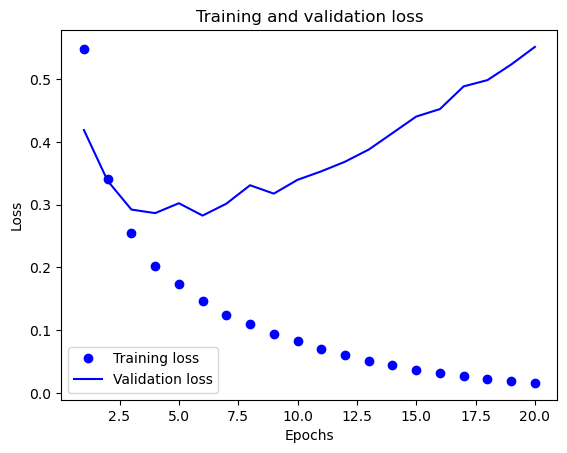

In [31]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#  Plotting the training and validation accuracy

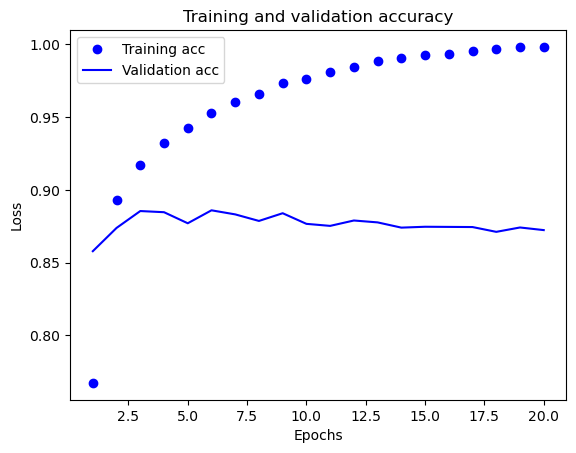

In [39]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

##### Let’s train a new network from scratch for four epochs and then evaluate it on the test data

In [34]:
model = models.Sequential()
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(32, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

In [35]:
model.compile(optimizer='rmsprop',
             loss='mse',
             metrics=['accuracy'])

In [36]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 4s 47ms/step - loss: 0.1405 - accuracy: 0.8157
Epoch 2/4
49/49 [==============================] - 2s 45ms/step - loss: 0.0791 - accuracy: 0.8979
Epoch 3/4
49/49 [==============================] - 2s 40ms/step - loss: 0.0629 - accuracy: 0.9186
Epoch 4/4
782/782 [==============================] - 30s 7ms/step - loss: 0.0872 - accuracy: 0.8837


In [37]:
results

[0.08723697066307068, 0.883679986000061]

In [38]:
model.predict(x_test)

782/782 [==============================] - 28s 5ms/step


array([[0.1029767 ],
       [0.9994024 ],
       [0.86943406],
       ...,
       [0.0909908 ],
       [0.04432235],
       [0.24993764]], dtype=float32)